In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import hamming_loss

In [2]:
file = open('WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
    try:
        line = line.split(',')
        last = line[5].split(';')[0]
        last = last.strip()
        if last == '':
            break;
        temp = [line[0], line[1], line[2], line[3], line[4], last]
        processedList.append(temp)
    except:
        print('Error at line number: ', i)

Error at line number:  281873
Error at line number:  281874
Error at line number:  281875


In [3]:
processedList[:100]

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [4]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [5]:
data.shape

(343416, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [7]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [8]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [9]:
Fs = 20
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

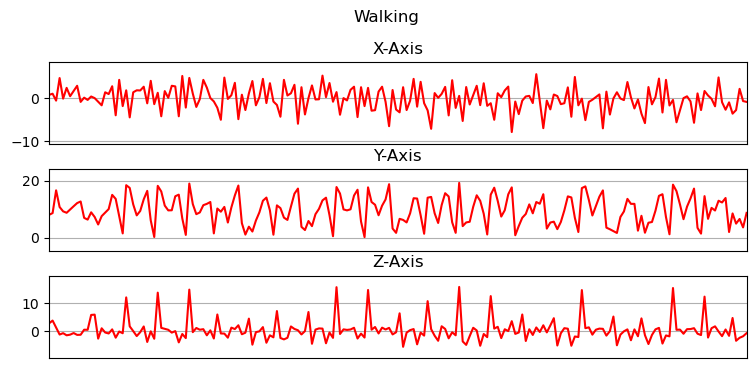

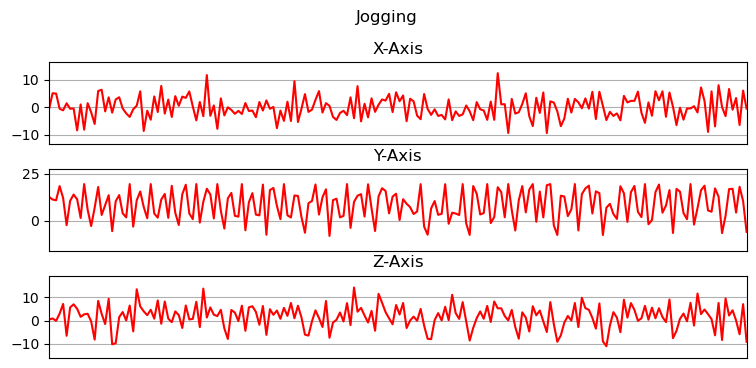

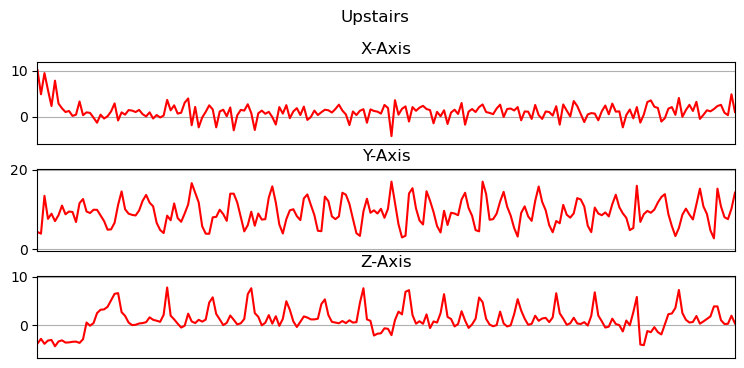

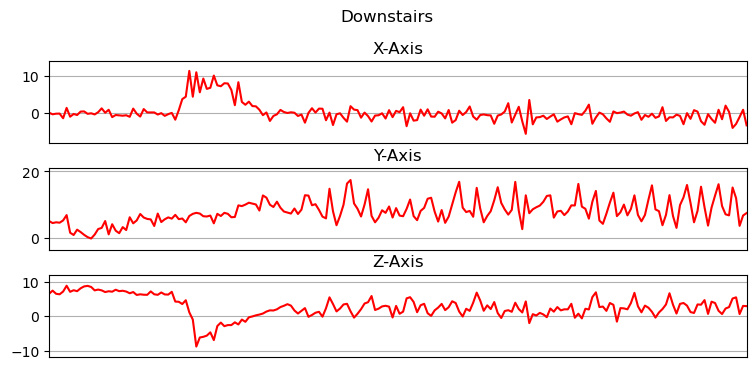

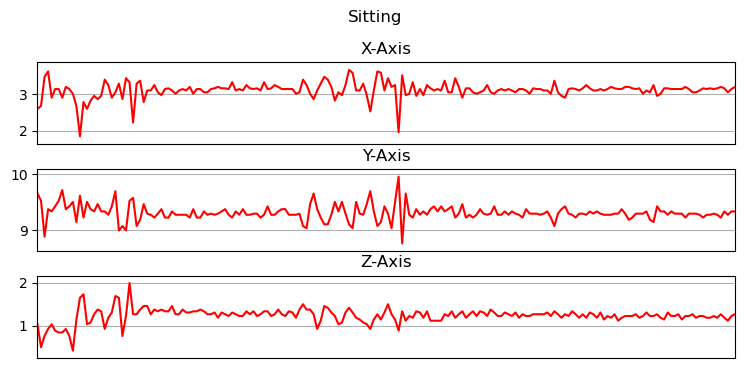

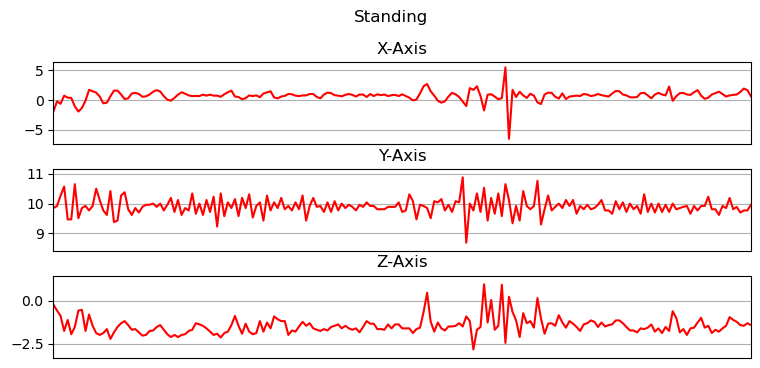

In [10]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(9, 4), sharex=True)
    plot_axis(ax0, data['time'], data['x'], 'X-Axis')
    plot_axis(ax1, data['time'], data['y'], 'Y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'Z-Axis')
    plt.subplots_adjust(hspace=0.3)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.85)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)][:Fs*10]
    plot_activity(activity, data_for_plot)

In [11]:
df = data.drop(['user', 'time'], axis = 1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [12]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [13]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

C:\Users\RAVI RAJ\AppData\Local\Temp\ipykernel_9716\4122297741.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])


(21330, 4)

In [14]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Downstairs    3555
Sitting       3555
Standing      3555
Name: activity, dtype: int64

In [15]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [16]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [17]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [18]:
X = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x', 'y', 'z'])
scaled_X['label'] = y.values

scaled_X.head()

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5


In [19]:
Fs = 20
frame_size = Fs*4 # 80
hop_size = Fs*2 # 40

def get_frames(df, frame_size, hop_size):

    N_FEATURES = 3

    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        x = df['x'].values[i: i + frame_size]
        y = df['y'].values[i: i + frame_size]
        z = df['z'].values[i: i + frame_size]
        
        # Retrieve the used label
        label = stats.mode(df['label'][i: i + frame_size])[0][0]
        frames.append([x, y, z])
        labels.append(label)

    # Reshape
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels)

    return frames, labels

X, y = get_frames(scaled_X, frame_size, hop_size)

X.shape, y.shape

C:\Users\RAVI RAJ\AppData\Local\Temp\ipykernel_9716\2828031039.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['label'][i: i + frame_size])[0][0]


((532, 80, 3), (532,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [21]:
X_train[0].shape, X_test[0].shape

((80, 3), (80, 3))

In [22]:
X_train = X_train.reshape(425, 80, 3, 1)
X_test = X_test.reshape(107, 80, 3, 1)
X_train[0].shape, X_test[0].shape

((80, 3, 1), (80, 3, 1))

In [23]:
model = Sequential()
model.add(Conv2D(32, (2, 2), activation = 'relu', input_shape = X_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

In [24]:
model.compile(optimizer=Adam(learning_rate = 0.003), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 250, validation_data= (X_test, y_test), verbose=1)

Epoch 1/250
14/14 [==============================] - 4s 97ms/step - loss: 1.3266 - accuracy: 0.4800 - val_loss: 0.5476 - val_accuracy: 0.7850
Epoch 2/250
14/14 [==============================] - 1s 90ms/step - loss: 0.5913 - accuracy: 0.7647 - val_loss: 0.3078 - val_accuracy: 0.8879
Epoch 3/250
14/14 [==============================] - 1s 71ms/step - loss: 0.2819 - accuracy: 0.9176 - val_loss: 0.2204 - val_accuracy: 0.8879
Epoch 4/250
14/14 [==============================] - 1s 61ms/step - loss: 0.2338 - accuracy: 0.9059 - val_loss: 0.2528 - val_accuracy: 0.9065
Epoch 5/250
14/14 [==============================] - 1s 70ms/step - loss: 0.1719 - accuracy: 0.9482 - val_loss: 0.2387 - val_accuracy: 0.8879
Epoch 6/250
14/14 [==============================] - 1s 50ms/step - loss: 0.1242 - accuracy: 0.9624 - val_loss: 0.1665 - val_accuracy: 0.9159
Epoch 7/250
14/14 [==============================] - 1s 71ms/step - loss: 0.0611 - accuracy: 0.9882 - val_loss: 0.2086 - val_accuracy: 0.9252
Epoch 

14/14 [==============================] - 0s 32ms/step - loss: 0.0089 - accuracy: 0.9976 - val_loss: 0.2208 - val_accuracy: 0.9439
Epoch 59/250
14/14 [==============================] - 0s 34ms/step - loss: 0.0182 - accuracy: 0.9976 - val_loss: 0.2575 - val_accuracy: 0.9533
Epoch 60/250
14/14 [==============================] - 0s 32ms/step - loss: 0.0024 - accuracy: 0.9976 - val_loss: 0.3050 - val_accuracy: 0.9439
Epoch 61/250
14/14 [==============================] - 0s 33ms/step - loss: 0.0110 - accuracy: 0.9953 - val_loss: 0.2536 - val_accuracy: 0.9346
Epoch 62/250
14/14 [==============================] - 0s 33ms/step - loss: 0.0098 - accuracy: 0.9976 - val_loss: 0.2179 - val_accuracy: 0.9533
Epoch 63/250
14/14 [==============================] - 1s 48ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.1856 - val_accuracy: 0.9626
Epoch 64/250
14/14 [==============================] - 1s 39ms/step - loss: 0.0054 - accuracy: 0.9953 - val_loss: 0.2115 - val_accuracy: 0.9533
Epoch 65/250

Epoch 115/250
14/14 [==============================] - 1s 52ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.2821 - val_accuracy: 0.9626
Epoch 116/250
14/14 [==============================] - 1s 55ms/step - loss: 0.0271 - accuracy: 0.9882 - val_loss: 0.2541 - val_accuracy: 0.9626
Epoch 117/250
14/14 [==============================] - 1s 53ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.2719 - val_accuracy: 0.9439
Epoch 118/250
14/14 [==============================] - 1s 57ms/step - loss: 0.0242 - accuracy: 0.9953 - val_loss: 0.2804 - val_accuracy: 0.9346
Epoch 119/250
14/14 [==============================] - 1s 53ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.2566 - val_accuracy: 0.9626
Epoch 120/250
14/14 [==============================] - 1s 40ms/step - loss: 0.0107 - accuracy: 0.9953 - val_loss: 0.3753 - val_accuracy: 0.9252
Epoch 121/250
14/14 [==============================] - 1s 38ms/step - loss: 0.0054 - accuracy: 0.9976 - val_loss: 0.3161 - val_accuracy:

14/14 [==============================] - 1s 68ms/step - loss: 3.5539e-04 - accuracy: 1.0000 - val_loss: 0.3824 - val_accuracy: 0.9720
Epoch 172/250
14/14 [==============================] - 1s 50ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2718 - val_accuracy: 0.9720
Epoch 173/250
14/14 [==============================] - 1s 42ms/step - loss: 1.9135e-05 - accuracy: 1.0000 - val_loss: 0.2434 - val_accuracy: 0.9626
Epoch 174/250
14/14 [==============================] - 1s 38ms/step - loss: 4.1193e-05 - accuracy: 1.0000 - val_loss: 0.2380 - val_accuracy: 0.9626
Epoch 175/250
14/14 [==============================] - 1s 37ms/step - loss: 0.0090 - accuracy: 0.9976 - val_loss: 0.2028 - val_accuracy: 0.9439
Epoch 176/250
14/14 [==============================] - 1s 45ms/step - loss: 8.0585e-04 - accuracy: 1.0000 - val_loss: 0.2220 - val_accuracy: 0.9533
Epoch 177/250
14/14 [==============================] - 1s 47ms/step - loss: 4.8261e-04 - accuracy: 1.0000 - val_loss: 0.2146 - val_acc

Epoch 227/250
14/14 [==============================] - 1s 84ms/step - loss: 2.6188e-04 - accuracy: 1.0000 - val_loss: 0.2460 - val_accuracy: 0.9720
Epoch 228/250
14/14 [==============================] - 1s 62ms/step - loss: 3.1195e-04 - accuracy: 1.0000 - val_loss: 0.2371 - val_accuracy: 0.9720
Epoch 229/250
14/14 [==============================] - 1s 56ms/step - loss: 1.6556e-04 - accuracy: 1.0000 - val_loss: 0.2475 - val_accuracy: 0.9720
Epoch 230/250
14/14 [==============================] - 1s 63ms/step - loss: 6.4776e-04 - accuracy: 1.0000 - val_loss: 0.2550 - val_accuracy: 0.9720
Epoch 231/250
14/14 [==============================] - 1s 56ms/step - loss: 5.0419e-04 - accuracy: 1.0000 - val_loss: 0.2595 - val_accuracy: 0.9720
Epoch 232/250
14/14 [==============================] - 1s 46ms/step - loss: 6.0155e-05 - accuracy: 1.0000 - val_loss: 0.2613 - val_accuracy: 0.9720
Epoch 233/250
14/14 [==============================] - 1s 42ms/step - loss: 7.5769e-04 - accuracy: 1.0000 - val_

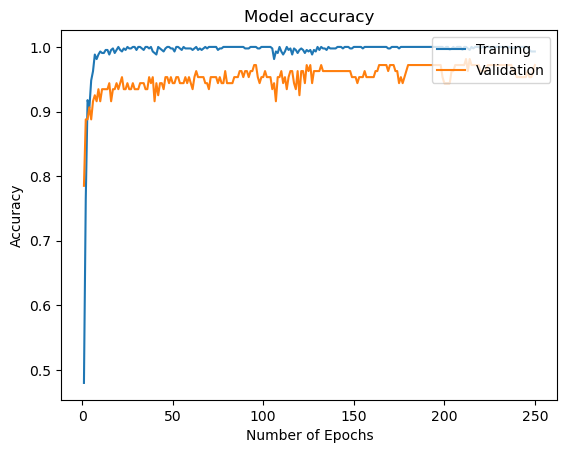

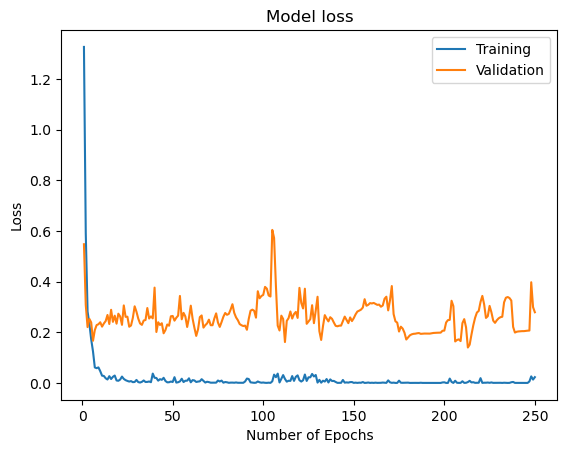

In [25]:
def plot_learningCurve(history, epochs):
  # Plotting the accuracy graph of training & validation
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Number of Epochs')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

  # Plotting the loss graph of training & validation
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Number of Epochs')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

plot_learningCurve(history, 250)

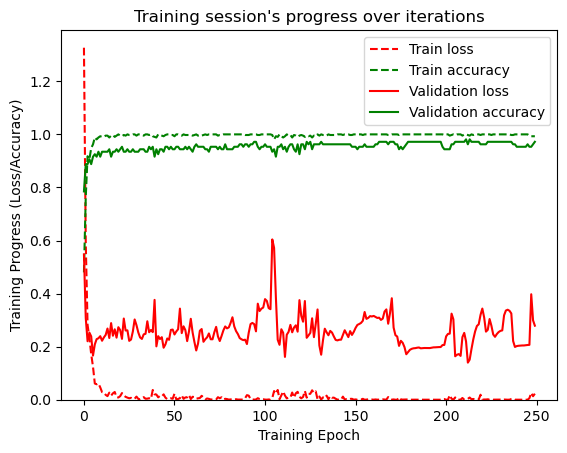

In [26]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='upper right')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [27]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must not be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')
    
truth = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]
prediction = ["Downstairs", "Jogging", "Sitting", "Standing", "Upstairs", "Walking"]

4/4 [==============================] - 0s 30ms/step


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

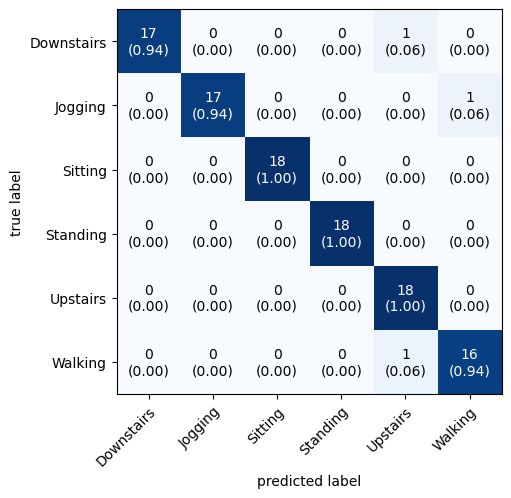

In [28]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed=True, figsize=(5,5))

In [29]:
print("Precision Score : ",precision_score(y_test, y_pred, average=None))
print("Recall Score : ",recall_score(y_test, y_pred, average=None))
print("Accuracy Score :", accuracy_score(y_test, y_pred, normalize=True))
print("Loss Score :", hamming_loss(y_test, y_pred))

Precision Score :  [1.         1.         1.         1.         0.9        0.94117647]
Recall Score :  [0.94444444 0.94444444 1.         1.         1.         0.94117647]
Accuracy Score : 0.9719626168224299
Loss Score : 0.028037383177570093
